### Problem Statement

A bakery produces two products: cakes and muffins. The profit and resource requirements are as follows:

#### Profit per unit:

Cake: $15

Muffin: $5

#### Baking Time Constraint:

Each cake requires 2 hours of baking.

Each muffin requires 0.5 hours of baking.

Total available baking time per day is 40 hours.

#### Contract Requirement:

The bakery must produce at least 3 cakes per day.

#### Decision Variables:

Let x be the number of cakes.

Let y be the number of muffins.

Both x & y must be nonnegative integers.

#### The goal is to maximize profit:

P(x,y)=15x+5y,

subject to:

2x+0.5y≤40,x≥3,x,y≥0,x,y∈Z.

### Taking It Further:

#### Additional Challenge: 

Suppose the bakery also faces a limitation that the total number of products (cakes plus muffins) cannot exceed 20.

In [14]:
from pulp import LpProblem, LpMaximize, LpInteger, LpVariable, value

In [15]:
problem = LpProblem("Bakery profit optimization", LpMaximize)

x = LpVariable('x', lowBound=3, cat=LpInteger)
y = LpVariable('y', lowBound=0, cat=LpInteger)

/Users/max.howard/development/learning/optimization/env/lib/python3.13/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [16]:
# Objective function

problem += 15 * x + 5 * y, "Profit"

# Constraints

problem += 2 * x  + 0.5 * y <= 40, "Baking time constraint"

problem += x + y <= 20, "Total products constraint"

In [17]:
problem.solve()

optimal_cakes = value(x)
optimal_muffins = value(y)
optimal_profit = value(problem.objective)

print("Optimal solution: cakes=",optimal_cakes," muffins=", optimal_muffins)
print("maximized profit=", optimal_profit)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/max.howard/development/learning/optimization/env/lib/python3.13/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/13a47dd14c804dffb4bb72de09a92880-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/13a47dd14c804dffb4bb72de09a92880-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 18 RHS
At line 21 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 300 - 0.00 seconds
Cgl0004I processed model has 2 rows, 2 columns (2 integer (0 of which binary)) and 4 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0012I Integer solution of -300 found by DiveCoefficient after 0 iterations and 0 nodes (

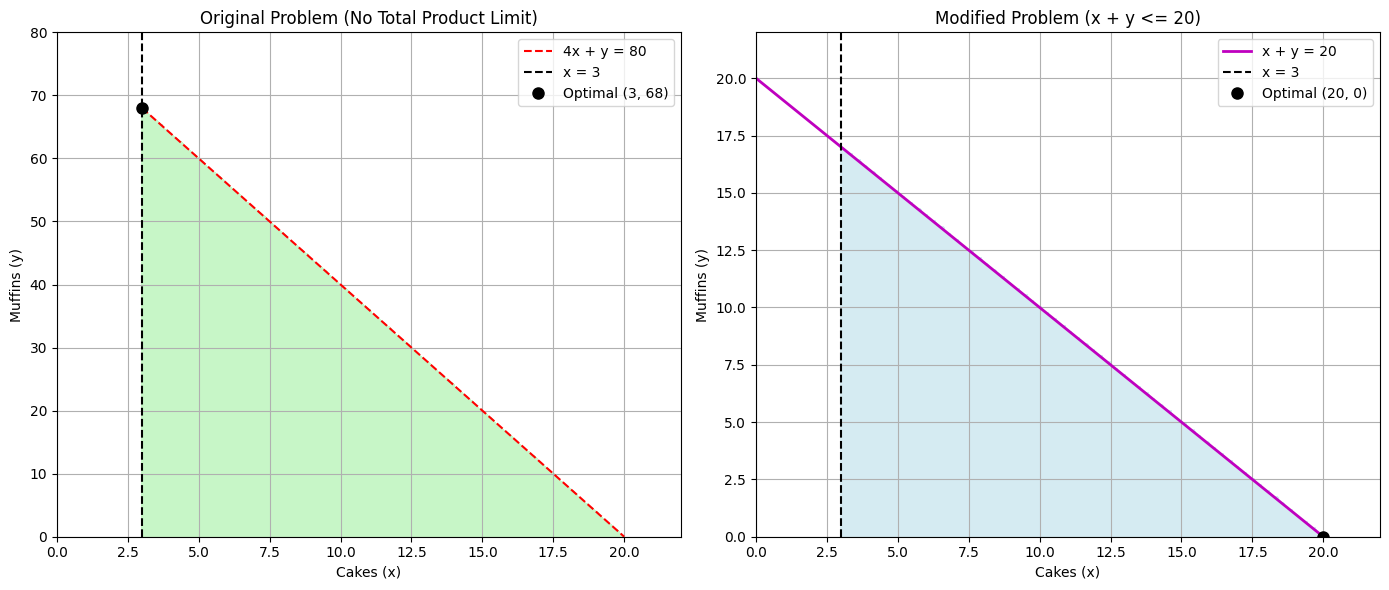

In [19]:
# Visualize the problem

import numpy as np
import matplotlib.pyplot as plt

# ---------------------
# Visualization Setup
# ---------------------

# For both problems, the decision variables:
# x: number of cakes, y: number of muffins.

# Original Problem:
# Maximize P(x,y) = 15x + 5y
# subject to: 
#    2x + 0.5y <= 40  -->  Multiply both sides by 2: 4x + y <= 80
#    x >= 3,  x,y >= 0
# The feasible region is defined by:
#    x in [3, 20] (since if y = 0, 4x <= 80, so x <= 20)
#    y <= 80 - 4x
# Optimal solution: (x, y) = (3, 68)

# Modified Problem (Taking It Further):
# Same as above with an extra constraint: x + y <= 20.
# Now the feasible region is the intersection of:
#    x >= 3, y >= 0, and x + y <= 20.
# Optimal solution: (x, y) = (20, 0) with profit = 15*20 + 5*0 = 300

# ---------------------
# Left Subplot: Original Problem
# ---------------------
# Create a grid for plotting
x_vals = np.linspace(0, 22, 300)
y_vals = np.linspace(0, 80, 300)
X, Y = np.meshgrid(x_vals, y_vals)

# Constraint: 4x + y <= 80  --> y <= 80 - 4x
# Define a mask for the feasible region (original)
feasible_mask_orig = (X >= 3) & (Y >= 0) & (Y <= 80 - 4*X)

# Create a figure and first subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ax = axs[0]
ax.set_title("Original Problem (No Total Product Limit)")
ax.set_xlabel("Cakes (x)")
ax.set_ylabel("Muffins (y)")
ax.set_xlim(0, 22)
ax.set_ylim(0, 80)
ax.grid(True)

# Plot the boundary: 4x + y = 80
x_line = np.linspace(3, 20, 200)
y_line = 80 - 4*x_line
ax.plot(x_line, y_line, 'r--', label="4x + y = 80")

# Plot vertical boundary x = 3
ax.axvline(3, color='k', linestyle='--', label="x = 3")

# Fill the feasible region for the original problem
# The feasible region is the set of points satisfying x>=3 and y <= 80-4x.
# We approximate by plotting the mask.
ax.contourf(X, Y, feasible_mask_orig, levels=[0.5, 1], colors=['lightgreen'], alpha=0.5)
# Mark the optimal solution (3,68)
ax.plot(3, 80 - 4*3, 'ko', markersize=8, label="Optimal (3, 68)")

ax.legend(loc="upper right")

# ---------------------
# Right Subplot: Modified Problem
# ---------------------
# Additional constraint: x + y <= 20.
# Feasible region is now defined by x>=3, y>=0, and x+y<=20.
# Create a mask for the modified feasible region.
feasible_mask_mod = (X >= 3) & (Y >= 0) & (X + Y <= 20)

ax2 = axs[1]
ax2.set_title("Modified Problem (x + y <= 20)")
ax2.set_xlabel("Cakes (x)")
ax2.set_ylabel("Muffins (y)")
ax2.set_xlim(0, 22)
ax2.set_ylim(0, 22)
ax2.grid(True)

# Plot the additional constraint: x + y = 20
x_line_mod = np.linspace(0, 20, 200)
y_line_mod = 20 - x_line_mod
ax2.plot(x_line_mod, y_line_mod, 'm-', linewidth=2, label="x + y = 20")

# Plot vertical boundary x = 3
ax2.axvline(3, color='k', linestyle='--', label="x = 3")

# Fill the modified feasible region
ax2.contourf(X, Y, feasible_mask_mod, levels=[0.5, 1], colors=['lightblue'], alpha=0.5)
# Mark the optimal solution (20,0)
ax2.plot(20, 0, 'ko', markersize=8, label="Optimal (20, 0)")

ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()
